<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Deep_Learning/7_%EC%88%98%EC%B9%98%EB%AF%B8%EB%B6%84%EA%B3%BC_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


$$
\frac{ df(x) }{ dx }  =  \lim_{h\to 0} \frac{f(x+h) - f(x)}{ h }
$$

In [3]:
import numpy as np

# 미분의 나쁜 구현
def numerical_diff(f, x):
  h = 10e-50 # 0.0000 0이 50개
  return (f(x+h) - f(x)) / h

너무나 작은 숫자로 나눗셈을 하게 되면, 컴퓨팅 시스템상 부동소수점 오류가 나게 된다. **반올림 오차**가 등장함

In [4]:
np.float32(10e-50)

0.0

In [5]:
1000 / np.float32(10e-50)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf

아주 작은 값을 의미하는 $h$는 보통 `1e-4` 정도로 주면 좋은 효과를 낸다고 알려져 있다.

수학적인 기교를 이용해 컴퓨터를 활용한 미분에서의 나눗셈 오류를 해결할 수 있다.

**중앙차분과 전방차분을 활용**

In [6]:
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2 * h)

수치 미분과 기울기의 관계

$$
y = 0.01x^2 + 0.1x
$$

In [7]:
def function_1(x):
  return 0.01*x**2 + 0.1 * x

In [8]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

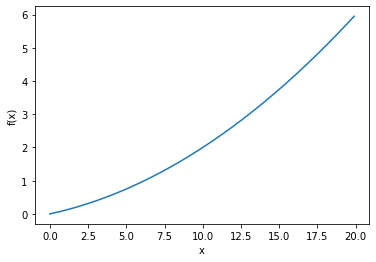

In [9]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [10]:
# x가 5일 때의 미분값과 10일 때의 해당 함수의 미분값 구하기
print("x가 5일 때 미분 값 : {}".format(numerical_diff(function_1, 5)))
print("x가 10일 때 미분 값 : {}".format(numerical_diff(function_1, 10)))

x가 5일 때 미분 값 : 0.1999999999990898
x가 10일 때 미분 값 : 0.2999999999986347


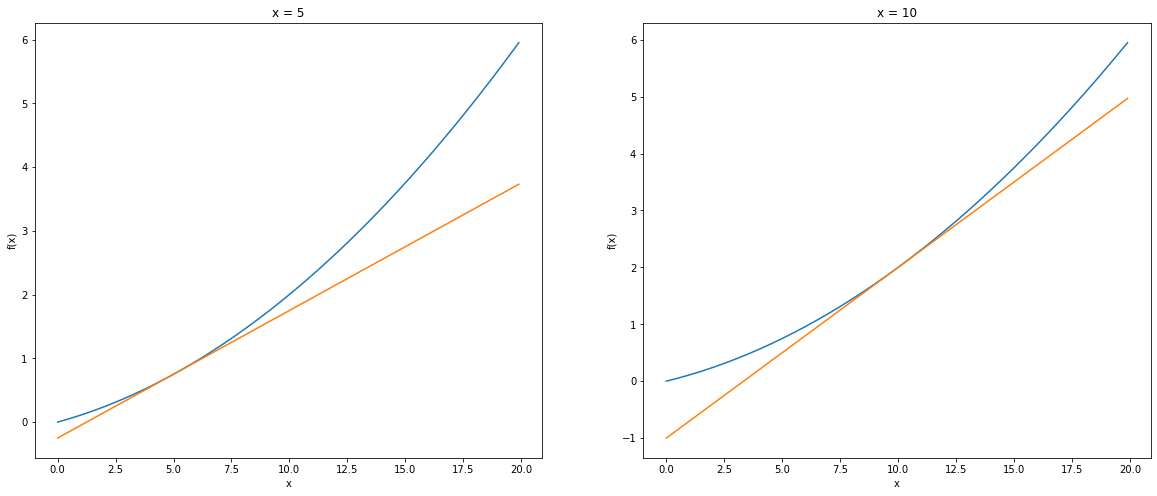

In [11]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()